<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/04-text-mining/BA820_In_class_exercise_unsolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence-transformers
!pip install umap-learn
!pip install yellowbrick
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 18.4 MB/s eta 0:00:00


## Loading The Dataset

We will try to analyze and pull insights from a board game reviews dataset.

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "2022-01-08.csv"

# Load the latest version
df_ratings = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jvanelteren/boardgamegeek-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

file_path = "bgg-15m-reviews.csv"

df_reviews = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jvanelteren/boardgamegeek-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


file_path = "games_detailed_info2025.csv"

df_game_details = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jvanelteren/boardgamegeek-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-43-00099517c00c>:10: DeprecationWarning:

load_dataset is deprecated and will be removed in future version.



<ipython-input-43-00099517c00c>:22: DeprecationWarning:

load_dataset is deprecated and will be removed in future version.



<ipython-input-43-00099517c00c>:35: DeprecationWarning:

load_dataset is deprecated and will be removed in future version.



In [ ]:
df_ratings = df_ratings[df_ratings["Users rated"] > 10000]

df_reviews = df_reviews[df_reviews["comment"].notna() ]

df_reviews = (
    df_reviews[df_reviews["ID"].isin(df_ratings["ID"].to_list())]
    .groupby("ID")  # Group by game ID
    .head(30)  # Keep only the first 30 reviews per game
    .reset_index(drop=True)  # Reset index for clean output
)

df_game_details = df_game_details[df_game_details["id"].isin(df_ratings["ID"].to_list())]

In [ ]:
df_ratings

,Unnamed: 0,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...
...,...,...,...,...,...,...,...,...,...,...
349,138,9609,War of the Ring,2004,139,7.77,7.406,10148,/boardgame/9609/war-ring,https://cf.geekdo-images.com/JmdqlBJBynZMOciZz...
350,151,70149,Ora et Labora,2011,152,7.70,7.376,10132,/boardgame/70149/ora-et-labora,https://cf.geekdo-images.com/MLvyN4VJ3QNXBKxli...
351,512,257501,KeyForge: Call of the Archons,2018,513,7.22,6.895,10123,/boardgame/257501/keyforge-call-archons,https://cf.geekdo-images.com/ZzJ2NGZz4CXxr1VIR...
352,406,150,PitchCar,1995,407,7.27,6.999,10023,/boardgame/150/pitchcar,https://cf.geekdo-images.com/lvC1qJo4-RQ_zqudi...


In [ ]:
df_game_details

,Unnamed: 0,type,id,thumbnail,image,alternate,description,yearpublished,minplayers,maxplayers,...,boardgameintegration,Abstract Game Rank,Party Game Rank,Thematic Rank,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,name
0,0,boardgame,13,https://cf.geekdo-images.com/PyUol9QxBnZQCJqZI...,https://cf.geekdo-images.com/PyUol9QxBnZQCJqZI...,"['Catan', 'Catan (Колонизаторы)', 'Catan telep...","In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CATAN
1,1,boardgame,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile placement game in which ...,2000,2,5,...,"['Carcassonne: Wheel of Fortune', 'Mists over ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carcassonne
2,2,boardgame,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pandemic
3,3,boardgame,68448,https://cf.geekdo-images.com/35h9Za_JvMMMtx_92...,https://cf.geekdo-images.com/35h9Za_JvMMMtx_92...,"['7 csoda', '7 Cudów Świata', '7 divů světa', ...",You are the leader of one of the 7 great citie...,2010,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 Wonders
4,4,boardgame,167791,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...,"['A Mars terraformálása', 'Mars: Teraformace',...","In the 2400s, mankind begins to terraform the ...",2016,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terraforming Mars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,441,boardgame,70149,https://cf.geekdo-images.com/MLvyN4VJ3QNXBKxli...,https://cf.geekdo-images.com/MLvyN4VJ3QNXBKxli...,"['Módl się i pracuj', 'Ora & Labora', '祈り、働け',...","In Ora et Labora (Latin for 'Pray and work'), ...",2011,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ora et Labora
447,447,boardgame,93260,https://cf.geekdo-images.com/JvkUZy1YS7V9GX-7J...,https://cf.geekdo-images.com/JvkUZy1YS7V9GX-7J...,['Summoner Wars: Mistrovská sada'],"Summoner Wars is a fast-playing, action-packed...",2011,2,4,...,"['Summoner Wars', 'Summoner Wars: Alliances Ma...",NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,Summoner Wars: Master Set
457,457,boardgame,9609,https://cf.geekdo-images.com/JmdqlBJBynZMOciZz...,https://cf.geekdo-images.com/JmdqlBJBynZMOciZz...,"['Guerra del Anillo', ""La Guerra dell'Anello"",...","In War of the Ring, one player takes control o...",2004,2,4,...,NaN,NaN,NaN,38.0,22.0,NaN,NaN,NaN,NaN,War of the Ring
462,462,boardgame,6472,https://cf.geekdo-images.com/Gr3qfzoK-428kv1M9...,https://cf.geekdo-images.com/Gr3qfzoK-428kv1M9...,"['Der eiserne Thron', 'Gra o Tron', 'Juego de ...",Description from the publisher:&#10;&#10;War a...,2003,3,5,...,NaN,NaN,NaN,NaN,188.0,NaN,NaN,NaN,NaN,A Game of Thrones


In [ ]:
df_reviews

,Unnamed: 0,user,rating,comment,ID,name
0,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
1,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
2,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic
3,5,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic
4,8,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic
...,...,...,...,...,...,...
10555,11795394,Misterpetersen,10.0,Amazing game and I had no interest in base gam...,291457,Gloomhaven: Jaws of the Lion
10556,11795404,kairos929,10.0,Excellent,291457,Gloomhaven: Jaws of the Lion
10557,11795410,darthbored,10.0,"Incredible, made my friends who never wanted t...",291457,Gloomhaven: Jaws of the Lion
10558,11795412,Ag0n1st,10.0,Favorite: Cooperative/Solo Game Cost $53.36 $6...,291457,Gloomhaven: Jaws of the Lion


#Q1:

Take a look at `df_ratings_popular_games`. Can you replace the different rating and ranking systems with a single *reliable* summary indicator spanning between 0 and 10?

*Steps:*

Put steps here...


<Axes: >

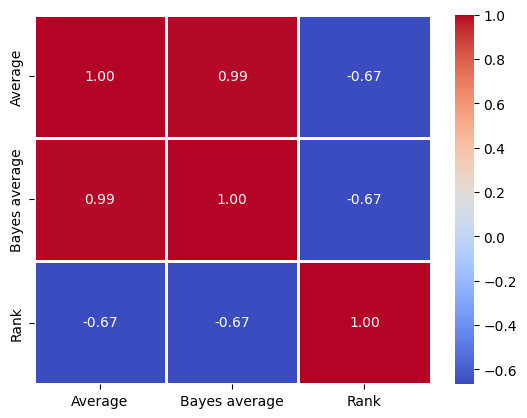

*Answer:*

Put answer here...

#Q2:

Take a look at `df_reviews`. Can you show a 3D plot that visualizes how similar the games are to each other based on the comments associated with them?

*Steps:*

Put steps here...


Batches:   0%|          | 0/1100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



*Answer:*


Put answer here...

#Q3:

Take a look at `df_reviews`. Check if the comments naturally group based on the review's rating, toxicity, and subjectivity?

*Steps:*

Put steps here...

*Answer:*

Put answer here..

#Q4:

Take a look at `df_game_details`. What are the top 5 topics you can extract for each game and what are the most pronounced relationships between these topics?

*Steps:*

Put steps here...

*Answer:*

Put answer here...